# Machine Learning
The "Machine learning" file performs data analysis on heart disease risk using various machine learning algorithms. The data is loaded from the "heart_disease_risk.csv" file and split into features and the target variable. Subsequently, the data is standardized, and performance metrics are measured for each model. This analysis provides significant insights into predicting heart disease risk using different machine learning algorithms.

### Required libraries

In [109]:
import pandas as pd
import xgboost as xgb

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from main import balance_data_smote, balance_data_smotetomek, display_confusion_matrix, display_results, generate_results, train_model

### Loading data

In [110]:
data = pd.read_csv('heart_disease_risk.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,decision
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
293,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
294,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
295,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


### Data Split: Features and Target

In [111]:
X = data.drop('decision', axis=1)
y = data['decision']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(207, 13) (90, 13) (207,) (90,)


### Standardization of Data

In [112]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

### Data Balancing

In [113]:
X_train, y_train = balance_data_smote(X_train, y_train)
# X_train, y_train = balance_data_smotetomek(X_train, y_train)

print(X_train.shape)
print(y_train.shape)

(228, 13)
(228,)


### Logistic Regression

Accuracy: 0.87
ROC AUC Score: 0.87
G-Mean: 0.74
F1 Score: 0.85
Sensitivity: 0.8
Specificity: 0.93
Precision: 0.92
AVG: 0.82


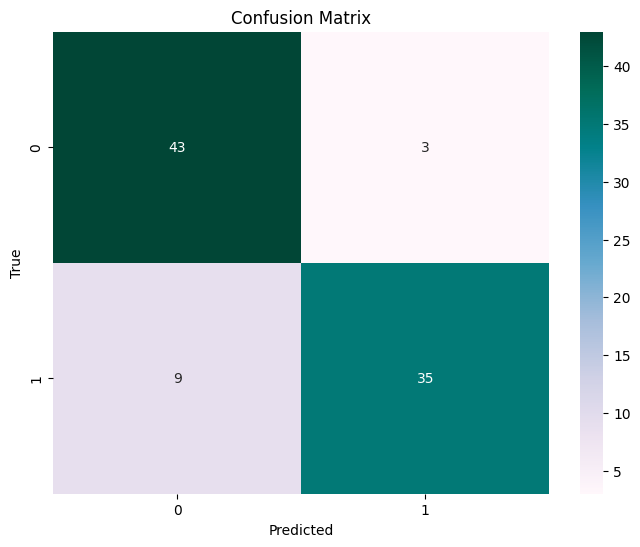

In [114]:
model = LogisticRegression(solver='liblinear')

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

### Support Vector Classifier

Accuracy: 0.62
ROC AUC Score: 0.62
G-Mean: 0.37
F1 Score: 0.57
Sensitivity: 0.52
Specificity: 0.72
Precision: 0.64
AVG: 0.52


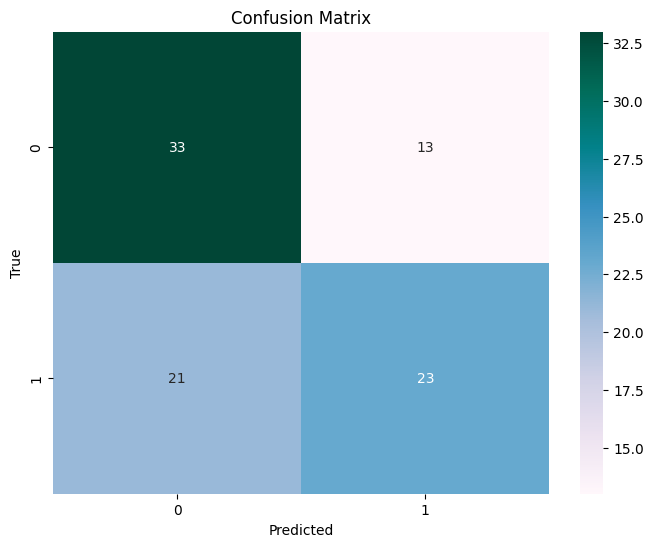

In [115]:
model = SVC()

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

### Decision Tree Classifier

Accuracy: 0.67
ROC AUC Score: 0.67
G-Mean: 0.44
F1 Score: 0.65
Sensitivity: 0.64
Specificity: 0.7
Precision: 0.67
AVG: 0.59


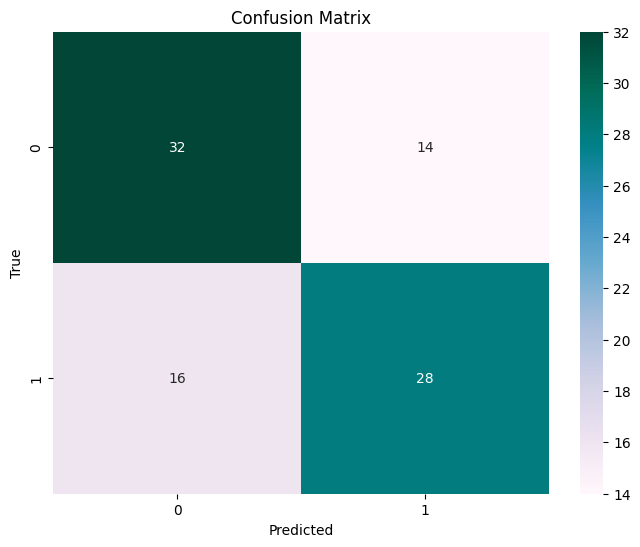

In [116]:
model = DecisionTreeClassifier()

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

### Random Forest Classification

Accuracy: 0.81
ROC AUC Score: 0.81
G-Mean: 0.65
F1 Score: 0.8
Sensitivity: 0.75
Specificity: 0.87
Precision: 0.85
AVG: 0.75


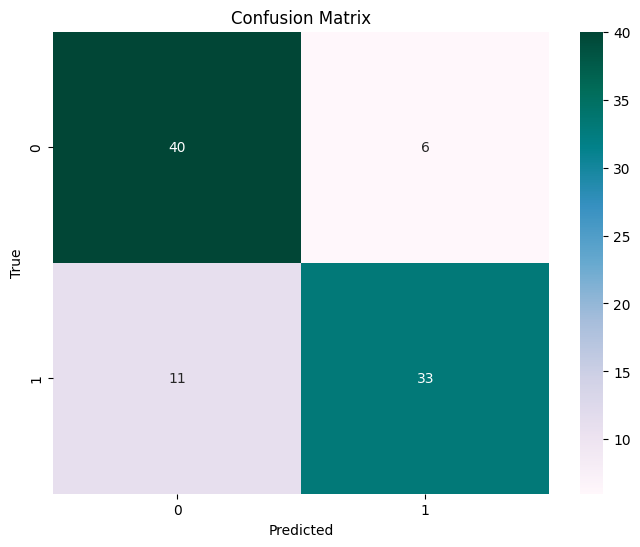

In [117]:
model = RandomForestClassifier()

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

### Ada Boost Classifier

Accuracy: 0.81
ROC AUC Score: 0.81
G-Mean: 0.66
F1 Score: 0.8
Sensitivity: 0.8
Specificity: 0.83
Precision: 0.81
AVG: 0.76


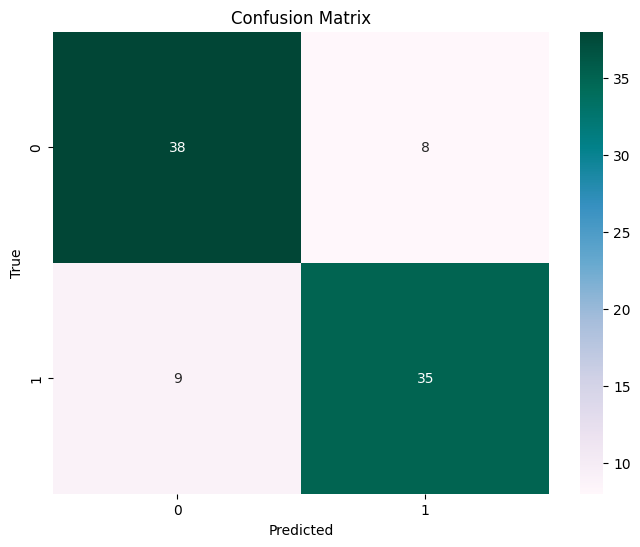

In [118]:
model = AdaBoostClassifier()

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

### XGBoost

Accuracy: 0.77
ROC AUC Score: 0.77
G-Mean: 0.59
F1 Score: 0.76
Sensitivity: 0.75
Specificity: 0.78
Precision: 0.77
AVG: 0.7


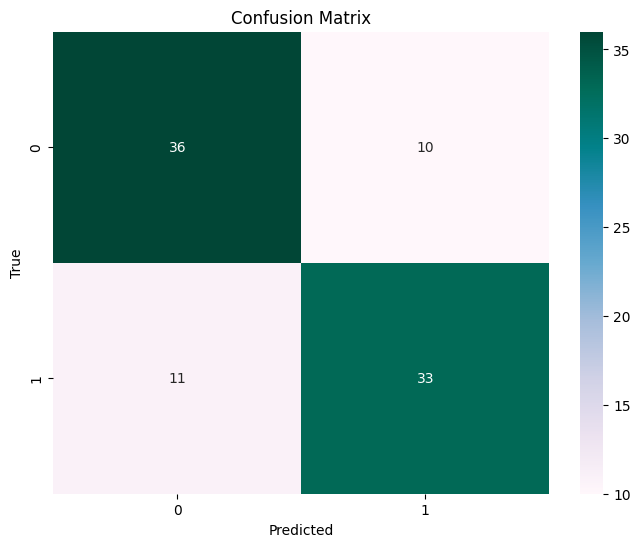

In [119]:
model = xgb.XGBClassifier()

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

### Neural Network Classification

Accuracy: 0.82
ROC AUC Score: 0.82
G-Mean: 0.66
F1 Score: 0.8
Sensitivity: 0.73
Specificity: 0.91
Precision: 0.89
AVG: 0.76


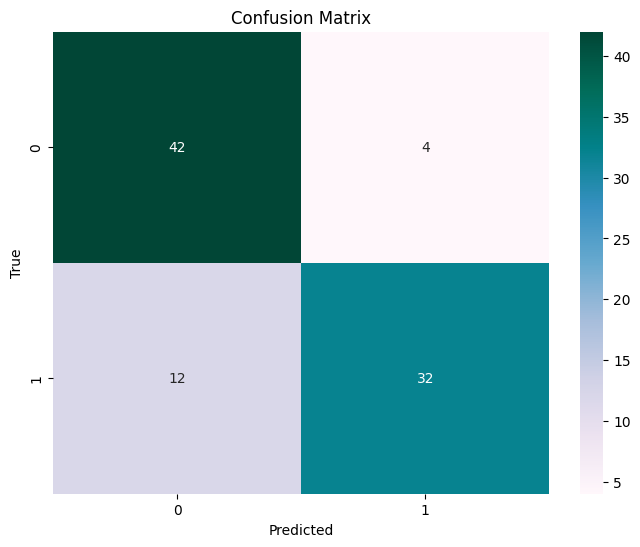

In [120]:
model = MLPClassifier(hidden_layer_sizes=(64, 64), activation='relu', solver='adam')

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

Accuracy: 0.63
ROC AUC Score: 0.63
G-Mean: 0.4
F1 Score: 0.62
Sensitivity: 0.61
Specificity: 0.65
Precision: 0.63
AVG: 0.55


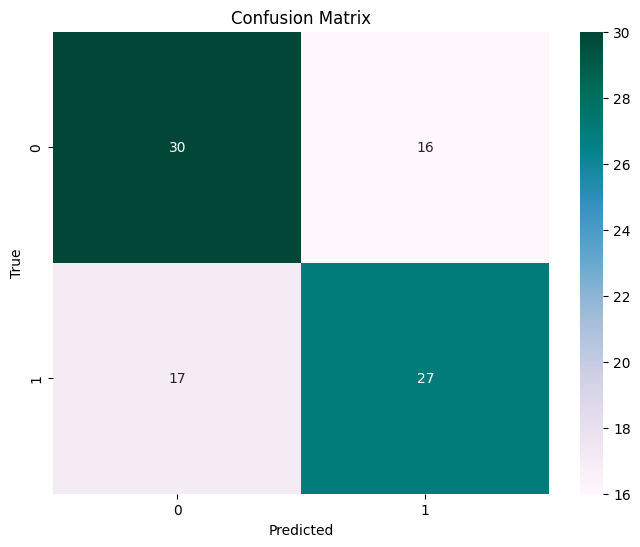

In [121]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

Accuracy: 0.77
ROC AUC Score: 0.77
G-Mean: 0.58
F1 Score: 0.75
Sensitivity: 0.73
Specificity: 0.8
Precision: 0.78
AVG: 0.7


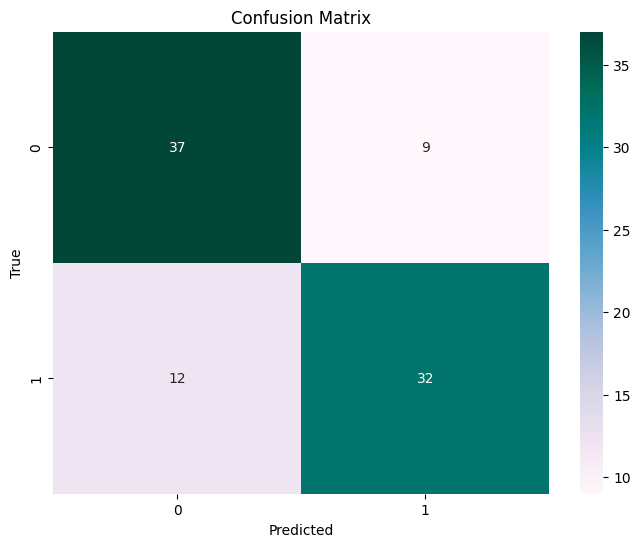

In [122]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

Learning rate set to 0.00548
0:	learn: 0.6890466	total: 144ms	remaining: 2m 23s
1:	learn: 0.6839827	total: 148ms	remaining: 1m 13s
2:	learn: 0.6789922	total: 151ms	remaining: 50.2s
3:	learn: 0.6747704	total: 154ms	remaining: 38.3s
4:	learn: 0.6708112	total: 157ms	remaining: 31.3s
5:	learn: 0.6660242	total: 161ms	remaining: 26.6s
6:	learn: 0.6617684	total: 165ms	remaining: 23.4s
7:	learn: 0.6575760	total: 169ms	remaining: 20.9s
8:	learn: 0.6524084	total: 172ms	remaining: 18.9s
9:	learn: 0.6481722	total: 175ms	remaining: 17.4s
10:	learn: 0.6438484	total: 179ms	remaining: 16.1s
11:	learn: 0.6399219	total: 183ms	remaining: 15s
12:	learn: 0.6354874	total: 186ms	remaining: 14.1s
13:	learn: 0.6323227	total: 190ms	remaining: 13.4s
14:	learn: 0.6289645	total: 194ms	remaining: 12.7s
15:	learn: 0.6244370	total: 198ms	remaining: 12.2s
16:	learn: 0.6206380	total: 202ms	remaining: 11.7s
17:	learn: 0.6165940	total: 206ms	remaining: 11.2s
18:	learn: 0.6127532	total: 211ms	remaining: 10.9s
19:	learn: 0

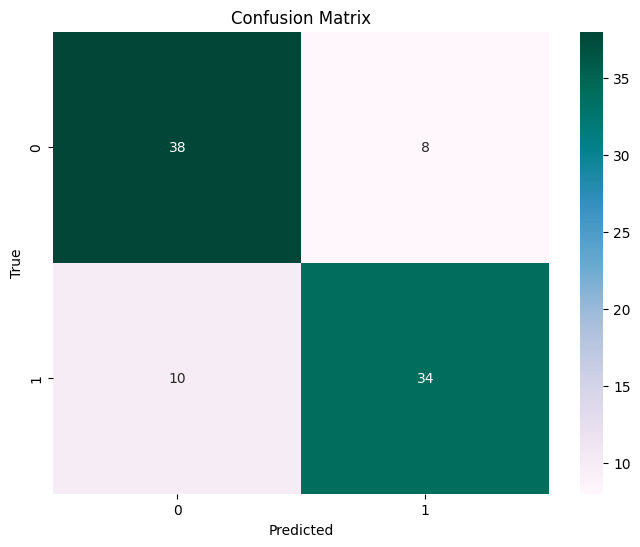

In [125]:
from catboost import CatBoostClassifier

model = CatBoostClassifier()

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)

[LightGBM] [Info] Number of positive: 114, number of negative: 114
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.083315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 259
[LightGBM] [Info] Number of data points in the train set: 228, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

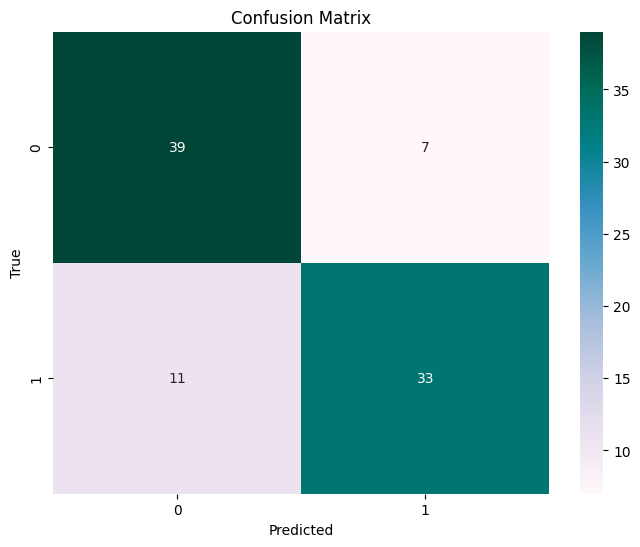

In [126]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()

y_pred = train_model(model, X_train, X_test, y_train)
results, conf_matrix = generate_results(y_pred, y_test)
display_results(results)
display_confusion_matrix(conf_matrix)